In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics
import seaborn as sns

In [4]:
df=pd.read_csv('usa_00011.csv', delimiter=',',na_values=[999999,99999]) 

In [5]:
df.head()

,YEAR,DATANUM,SERIAL,HHWT,STATEFIP,GQ,PERNUM,CBPERNUM,PERWT,SLWT,AGE,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,LABFORCE,INCWAGE
0,2007,1,399671,60,17,1,1,1,60,60,30,1,10,101,0,0,1,10,2,40000
1,2007,1,399673,119,17,1,3,3,55,55,27,1,10,101,0,0,1,10,2,35000
2,2007,1,399680,76,17,1,1,1,77,77,29,1,7,71,0,0,1,12,2,54000
3,2007,1,399688,89,17,1,2,2,81,81,27,1,10,101,0,0,1,10,2,40000
4,2007,1,399690,161,17,1,1,1,159,159,23,1,10,101,0,0,1,10,2,51000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92526 entries, 0 to 92525
Data columns (total 20 columns):
YEAR         92526 non-null int64
DATANUM      92526 non-null int64
SERIAL       92526 non-null int64
HHWT         92526 non-null int64
STATEFIP     92526 non-null int64
GQ           92526 non-null int64
PERNUM       92526 non-null int64
CBPERNUM     92526 non-null int64
PERWT        92526 non-null int64
SLWT         92526 non-null int64
AGE          92526 non-null int64
SCHOOL       92526 non-null int64
EDUC         92526 non-null int64
EDUCD        92526 non-null int64
GRADEATT     92526 non-null int64
GRADEATTD    92526 non-null int64
EMPSTAT      92526 non-null int64
EMPSTATD     92526 non-null int64
LABFORCE     92526 non-null int64
INCWAGE      92526 non-null int64
dtypes: int64(20)
memory usage: 14.1 MB


In [9]:
df.head()

,YEAR,DATANUM,SERIAL,HHWT,STATEFIP,GQ,PERNUM,CBPERNUM,PERWT,SLWT,AGE,SCHOOL,EDUC,EDUCD,GRADEATT,GRADEATTD,EMPSTAT,EMPSTATD,LABFORCE,INCWAGE
0,2007,1,399671,60,17,1,1,1,60,60,30,1,10,101,0,0,1,10,2,40000
1,2007,1,399673,119,17,1,3,3,55,55,27,1,10,101,0,0,1,10,2,35000
2,2007,1,399680,76,17,1,1,1,77,77,29,1,7,71,0,0,1,12,2,54000
3,2007,1,399688,89,17,1,2,2,81,81,27,1,10,101,0,0,1,10,2,40000
4,2007,1,399690,161,17,1,1,1,159,159,23,1,10,101,0,0,1,10,2,51000


In [11]:
df['PERNUM'].value_counts()

1     36522
2     26727
3     19632
4      6033
5      1971
6       883
7       388
8       196
9        93
10       41
11       22
12       14
15        2
13        2
Name: PERNUM, dtype: int64

In [13]:
df['AGE'].describe()

count    92526.000000
mean        25.662041
std          3.167271
min         17.000000
25%         23.000000
50%         26.000000
75%         28.000000
max         30.000000
Name: AGE, dtype: float64

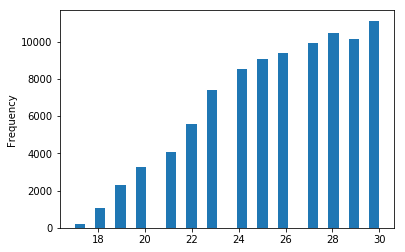

In [14]:
df['AGE'].plot(kind='hist',bins=30)
plt.show()

In [15]:
df['EDUCD'].unique()

array([101,  71,  62, 115,  40,  61, 114,  65,  81,  21,  30,  50, 116,
        24,  10,   2,  63,  64,  23,  22,  25,  26,  17,  16,  15,  11,
        14,  12], dtype=int64)

In [16]:
df['hs22_26']=(df['AGE']>=22) & (df['AGE']<=26)& (df['EDUCD']>=62)& (df['EDUCD']<=64)

In [18]:
df[['AGE','EDUCD','hs22_26']].head(20)

,AGE,EDUCD,hs22_26
0,30,101,False
1,27,101,False
2,29,71,False
3,27,101,False
4,23,101,False
5,21,62,False
6,27,71,False
7,27,62,False
8,28,115,False
9,28,115,False


In [19]:
df['hs22_26'].unique()

array([False,  True], dtype=bool)

In [20]:
df[df['hs22_26']==True].shape # row is how many records in this condition

(9939, 21)

In [21]:
df[df['hs22_26']==False].shape 

(82587, 21)

In [22]:
df_hs22_26=df[df['hs22_26']==True]

In [23]:
df['somecol22_26']=(df['AGE']>=22) & (df['AGE']<=26)& (df['EDUCD']>=65)&(df['EDUCD']<=80)

In [24]:
df['somecol22_26'].unique()

array([False,  True], dtype=bool)

In [25]:
df[df['somecol22_26']==True].shape # row is how many records in this condition

(8864, 22)

In [26]:
df[df['somecol22_26']==False].shape

(83662, 22)

In [46]:
df['assoc22_26']=(df['AGE']>=22) & (df['AGE']<=26)& (df['EDUCD']==81)

In [47]:
df['assoc22_26'].unique()

array([False,  True], dtype=bool)

In [48]:
df[df['assoc22_26']==True].shape # row is how many records in this condition

(3355, 23)

In [49]:
df[df['assoc22_26']==False].shape

(89171, 23)

In [50]:
df['ba22_26']=(df['AGE']>=22) & (df['AGE']<=26)& (df['EDUCD']==101)

In [51]:
df['ba22_26'].unique()

array([False,  True], dtype=bool)

In [52]:
df[df['ba22_26']==True].shape # row is how many records in this condition

(13448, 24)

In [53]:
df[df['ba22_26']==False].shape

(79078, 24)

In [54]:
df['grad22_26']=(df['AGE']>=22) & (df['AGE']<=26)& (df['EDUCD']>=114)

In [55]:
df['grad22_26'].unique()

array([False,  True], dtype=bool)

In [56]:
df[df['grad22_26']==True].shape # row is how many records in this condition

(1731, 25)

In [57]:
df[df['grad22_26']==False].shape

(90795, 25)

In [58]:
df['INCWAGE'].describe()

count     92526.000000
mean      31066.056546
std       28372.446485
min           0.000000
25%       13000.000000
50%       25000.000000
75%       41900.000000
max      505000.000000
Name: INCWAGE, dtype: float64

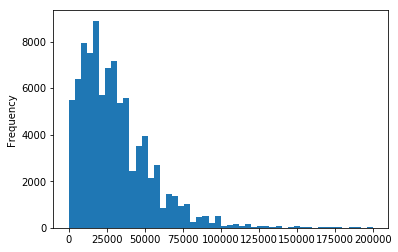

In [59]:
df['INCWAGE'].plot(kind='hist',bins=50,range=(4,200000)) # $1 per quarter = $4 year for qwi cut-off
plt.show()

In [60]:
df['PERWT'].describe()

count    92526.000000
mean       119.004874
std         93.390156
min          1.000000
25%         61.000000
50%         93.000000
75%        148.000000
max       1396.000000
Name: PERWT, dtype: float64

In [61]:
df['PERWT'].sum()

11011045L

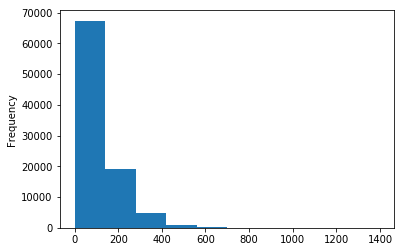

In [62]:
df['PERWT'].plot(kind='hist')
plt.show()

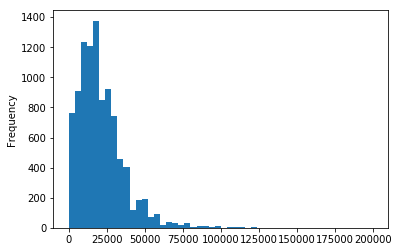

In [63]:
df_hs22_26['INCWAGE'].plot(kind='hist',bins=50,range=(4,200000)) # $1 per quarter = $4 year for qwi cut-off
plt.show()

In [64]:
df_hs22_26['INCWAGE'].describe()

count      9939.000000
mean      21264.243888
std       18945.382439
min           0.000000
25%       10000.000000
50%       18700.000000
75%       28000.000000
max      502000.000000
Name: INCWAGE, dtype: float64

In [65]:
df_hs22_26=df[df['hs22_26']==True]

In [66]:
df_hs22_26=df_hs22_26[['hs22_26','INCWAGE']]

In [68]:
hs22_26 = df['hs22_26']
df.groupby(hs22_26)['INCWAGE'].median()

hs22_26
False    26700
True     18700
Name: INCWAGE, dtype: int64

In [72]:
df_somecol22_26=df[df['somecol22_26']==True]

In [74]:
df_somecol22_26=df_somecol22_26[['somecol22_26','INCWAGE']]

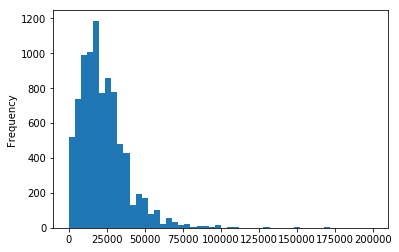

In [75]:
df_somecol22_26['INCWAGE'].plot(kind='hist',bins=50,range=(4,200000)) # $1 per quarter = $4 year for qwi cut-off
plt.show()

In [76]:
df_assoc22_26=df[df['assoc22_26']==True]

In [77]:
df_assoc22_26=df_assoc22_26[['assoc22_26','INCWAGE']]

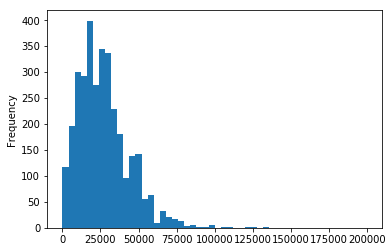

In [78]:
df_assoc22_26['INCWAGE'].plot(kind='hist',bins=50,range=(4,200000)) # $1 per quarter = $4 year for qwi cut-off
plt.show()

In [79]:
assoc22_26 = df['assoc22_26']
df.groupby(assoc22_26)['INCWAGE'].median()

assoc22_26
False    25000
True     25000
Name: INCWAGE, dtype: int64

In [43]:
col22_26 = df['col22_26']
df.groupby(col22_26)['INCWAGE'].median()

KeyError: 'col22_26'